# OCR with Python and Tesseract

This notebook comes from the Udemy course [Optical Character Recognition (OCR) in Python](https://www.udemy.com/course/ocr-optical-character-recognition-in-python/).

Table of contents:

- [Text recognition in images](#Text-recognition-in-images)
- [Selection of texts](#Selection-of-texts)
- [Searching specific information](#Searching-specific-information)
- [Detecting texts in natural scenarios](#Detecting-texts-in-natural-scenarios)

# Text recognition in images

## Installing Tesseract

- Documentation: https://pypi.org/project/pytesseract/

In [1]:
# See the notes on the README.md file for more information
#!sudo apt install tesseract-ocr
#!pip install pytesseract

## Importing the libraries

In [4]:
import pytesseract
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt

In [84]:
#from google.colab.patches import cv2_imshow
def cv2_imshow(img, to_rgb=True):
    if to_rgb:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    plt.imshow(img)
    plt.show()

In [56]:
DATAPATH = "../../material/"

## Reading the image

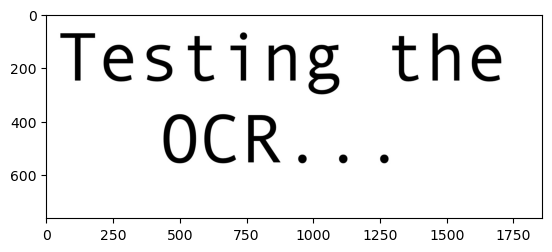

In [8]:
img = cv2.imread(DATAPATH+'Images/test01.jpg')
cv2_imshow(img)

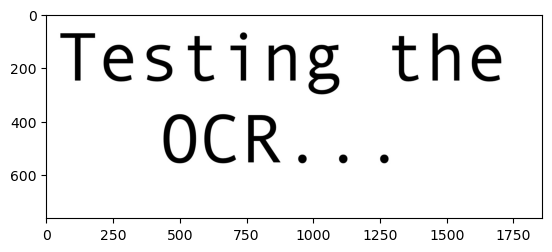

In [9]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [10]:
# Automatic text extraction: lines are detected, as well as strings
# but it fails when the image/text quality gets more complicated
text = pytesseract.image_to_string(rgb)

In [11]:
print(text)

Testing the
OCR...



## Support for other languages

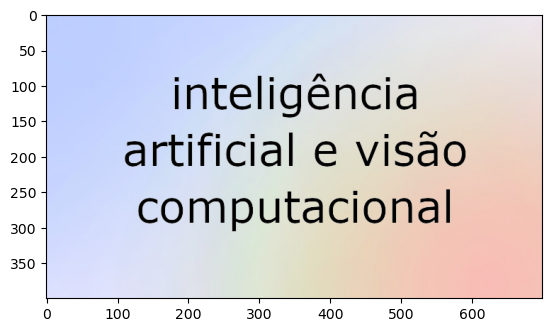

In [85]:
img = cv2.imread(DATAPATH+'Images/test02-02.jpg')
cv2_imshow(img)

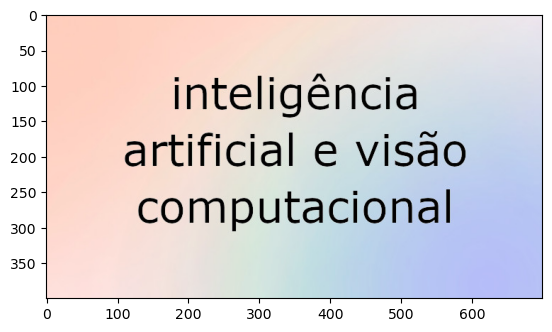

In [86]:
# Tesseract expects image arrays in RGB format!
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [87]:
# The text in the image is not perfectly correct
# because we don't specify the language (Portuguese)
text = pytesseract.image_to_string(rgb)
print(text)

inteligéncia
artificial e visao
computacional



In [18]:
# Shell/Terminal command to get all installed language packages
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (28):
cat
ces
chi_sim
chi_sim_vert
chi_tra
chi_tra_vert
dan
deu
ell
eng
equ
eus
fas
fra
frk
gla
gle
glg
hrv
ita
jpn
nld
nor
osd
pol
por
script/Latin
spa


In [22]:
# Tesseract version
!tesseract --version

tesseract v5.3.1.20230401
 leptonica-1.83.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 2.1.4) : libpng 1.6.39 : libtiff 4.5.0 : zlib 1.2.13 : libwebp 1.3.0 : libopenjp2 2.5.0
 Found AVX512BW
 Found AVX512F
 Found AVX512VNNI
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found libarchive 3.6.2 zlib/1.2.13 liblzma/5.2.9 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.2
 Found libcurl/8.0.1 Schannel zlib/1.2.13 brotli/1.0.9 zstd/1.5.4 libidn2/2.3.4 libpsl/0.21.2 (+libidn2/2.3.3) libssh2/1.10.0


In [24]:
# See README.md for more information on how to install other lang packages
#!apt-get install tesseract-ocr-por # Portuguese

In [25]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (28):
cat
ces
chi_sim
chi_sim_vert
chi_tra
chi_tra_vert
dan
deu
ell
eng
equ
eus
fas
fra
frk
gla
gle
glg
hrv
ita
jpn
nld
nor
osd
pol
por
script/Latin
spa


In [26]:
# Once we install the Portuguese package
# we specify it and use it.
# Now all symbols are correct
text = pytesseract.image_to_string(rgb, lang='por')
print(text)

inteligência
artificial e visão
computacional



In [88]:
# The recommended way of working with language packages
# is to download them to a local folder and to specify the directory
# in the config argument
!mkdir tessdata

A subdirectory or file tessdata already exists.


In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

In [90]:
# The recommended way of working with language packages
# is to download them to a local folder and to specify the directory
# in the config argument.
# We can pass any argument in the config option, but we don't get
# any errors if we pass something that doesn't work.
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

inteligência
artificial e visão
computacional



In [ ]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

In [36]:
!ls tessdata/

eng.traineddata
por.traineddata


## Parameters

### Page segmentation modes (PSM)

In [37]:
# We need to choose the page segmentation mode
# before processing an image with tesseract.
# If we don't, tesseract still works, but the results
# can be improved.
# These are the possible PSMs
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


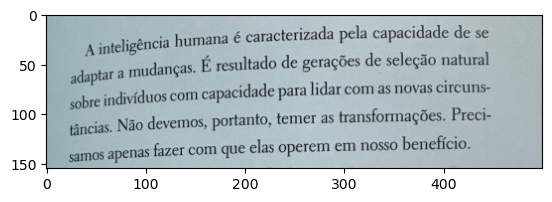

In [91]:
img = cv2.imread(DATAPATH+'Images/page-book.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [94]:
# We pass the parameters to the engine using config_tesseract
# PSM 6: Assume a single uniform block of text
# If we don't pass --psm 6, it still works, but the result is suboptimal
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [100]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



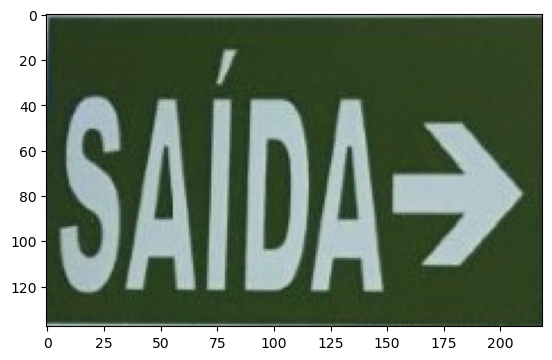

In [102]:
img = cv2.imread(DATAPATH+'Images/exit.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [103]:
# PSM 7: Treat the image as a single text line.
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>



### Page orientation

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

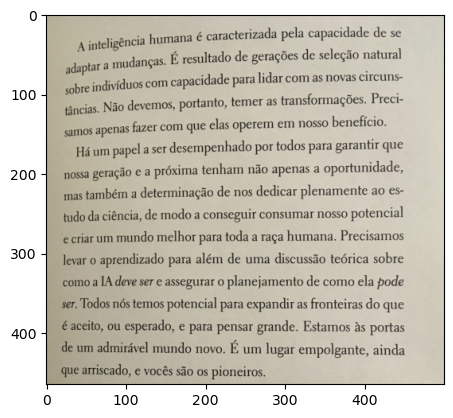

In [45]:
img = Image.open(DATAPATH+'Images/book01.jpg')
plt.imshow(img);

In [46]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



# Selection of texts



In [48]:
from pytesseract import Output

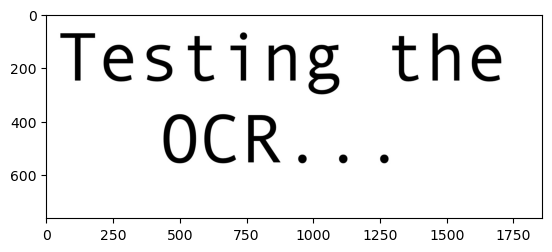

In [49]:
img = cv2.imread(DATAPATH+'Images/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [50]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 1034],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 526],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 514, 240],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 32],
 'conf': [-1, -1, -1, -1, 86, 92, -1, 88, 92],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}

- block_num = Current block number. When Tesseract performs the detections, it divides the image into several regions, which can vary according to the PSM parameters and also other criteria of the algorithm. Each block is a region

- conf = prediction confidence (from 0 to 100. -1 means no text was recognized)

- height = height of detected block of text (bounding box)

- left = x coordinate where the bounding box starts

- level = the level corresponds to the category of the detected block. There are 5 possible values:
  1. page
  2. block
  3. paragraph
  4. line
  5. word

Therefore, if 5 is returned, it means that the detected block is text, if it was 4, it means that a line was detected

- line_num = line number (starts from 0)

- page_num = the index of the page where the item was detected

- text = the recognition result

- top = y-coordinate where the bounding box starts

- width = width of the current detected text block

- word_num = word number (index) within the current block

In [ ]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [51]:
def bouding_box(result, img, i, color = (255,100,0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

    return x, y, img

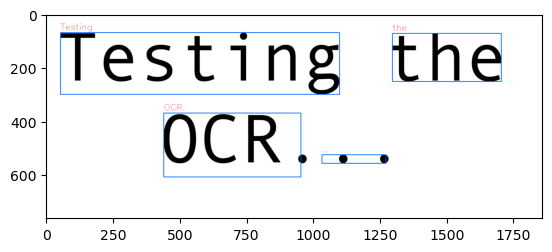

In [52]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    #print(i)
    confidence = int(result['conf'][i])
    #print(confidence)
    if confidence > min_confidence:
        #print(confidence)
        x, y, img = bouding_box(result, img_copy, i)
        #print(x,y)
        text = result['text'][i]
        cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

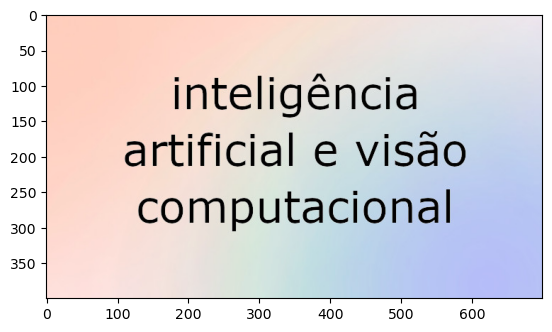

In [53]:
img = cv2.imread(DATAPATH+'Images/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [54]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type = Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [57]:
from PIL import ImageFont, ImageDraw, Image
font = DATAPATH+'Fonts/calibri.ttf'

In [58]:
def write_text(text, x, y, img, font, font_size = 32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font)
    img = np.array(img_pil)
    return img

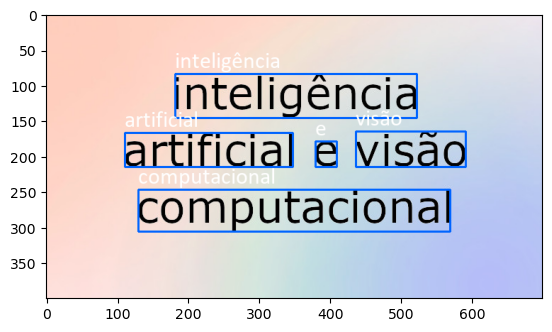

In [59]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        x, y, img = bouding_box(result, img_copy, i)
        text = result['text'][i]
        #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
        img_copy = write_text(text, x, y, img_copy, font)
cv2_imshow(img_copy)

# Searching specific information

In [60]:
import re # regular expressions

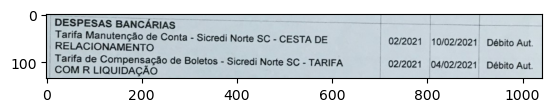

In [79]:
img = cv2.imread(DATAPATH+'Images/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [80]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [81]:
# https://regexr.com/
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

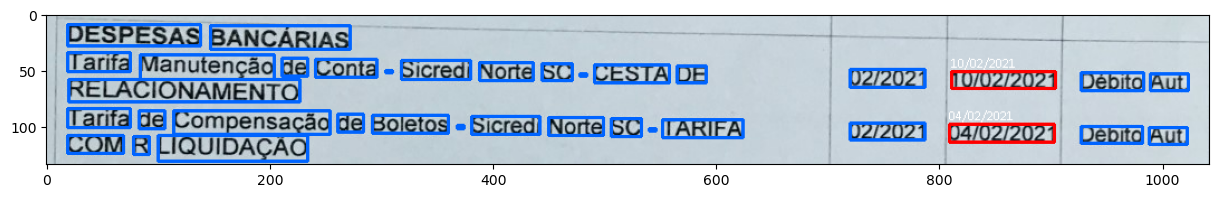

In [83]:
dates = []
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        text = result['text'][i]
        if re.match(date_pattern, text):
            x, y, img = bouding_box(result, img_copy, i, (0,0,255))
            #cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
            img_copy = write_text(text, x, y, img_copy, font, 12)
            dates.append(text)
        else:
              x, y, img_copy = bouding_box(result, img_copy, i)
plt.figure(figsize=(15,15))
cv2_imshow(img_copy)

In [65]:
dates

['10/02/2021', '04/02/2021']

# Detecting texts in natural scenarios

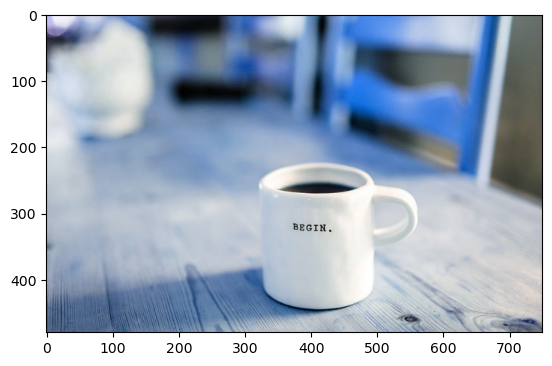

In [66]:
img = cv2.imread(DATAPATH+'Images/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [67]:
result = pytesseract.image_to_data(rgb, lang = 'eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 0, 0, 0, 0],
 'top': [0, 0, 0, 0, 0],
 'width': [750, 750, 750, 750, 750],
 'height': [480, 480, 480, 480, 480],
 'conf': [-1, -1, -1, -1, 95],
 'text': ['', '', '', '', '']}

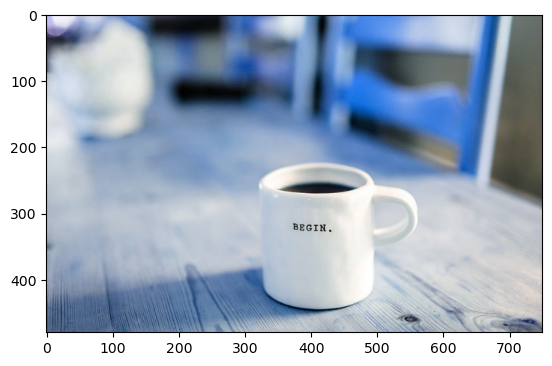

In [77]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        text = result['text'][i]
        if not text.isspace() and len(text) > 0:
            x, y, img = bouding_box(result, img_copy, i)
            cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

In [72]:
result['conf']

[-1, -1, -1, -1, 95]

In [73]:
result['text']

['', '', '', '', '']